In [ ]:
# Created by: Jess Gallo
# Date Created: 7/19/2022
# Last Modified: 7/19/2022
# Description: Forage - Cognizant Virtuall Experience - Exploratory Data Analysis (Task 1)

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing File
filename = r"C:\Users\Gallo\Downloads\sample_sales_data.csv"
dataCSV = pd.read_csv(filename, index_col=0)
df = pd.DataFrame(dataCSV)

In [3]:
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [10]:
df.isnull().any()

transaction_id    False
timestamp         False
product_id        False
category          False
customer_type     False
unit_price        False
quantity          False
total             False
payment_type      False
dtype: bool

There is no empty data

In [11]:
df.dtypes

transaction_id     object
timestamp          object
product_id         object
category           object
customer_type      object
unit_price        float64
quantity            int64
total             float64
payment_type       object
dtype: object

timestamp column is not in datetime dtype

In [12]:
# change object dtype of timestamp column to datetime dtype
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [13]:
df['timestamp'].dtype

dtype('<M8[ns]')

In [14]:
df.dtypes

transaction_id            object
timestamp         datetime64[ns]
product_id                object
category                  object
customer_type             object
unit_price               float64
quantity                   int64
total                    float64
payment_type              object
dtype: object

In [15]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 869.7+ KB


In [18]:
# do this for category, customer_type & payment_type columns to make sure data is clean
# did for all and all data is unique
payment = df['payment_type'].unique()
payment.sort()
payment

array(['cash', 'credit card', 'debit card', 'e-wallet'], dtype=object)

No handles with labels found to put in legend.


<AxesSubplot:xlabel='quantity', ylabel='unit_price'>

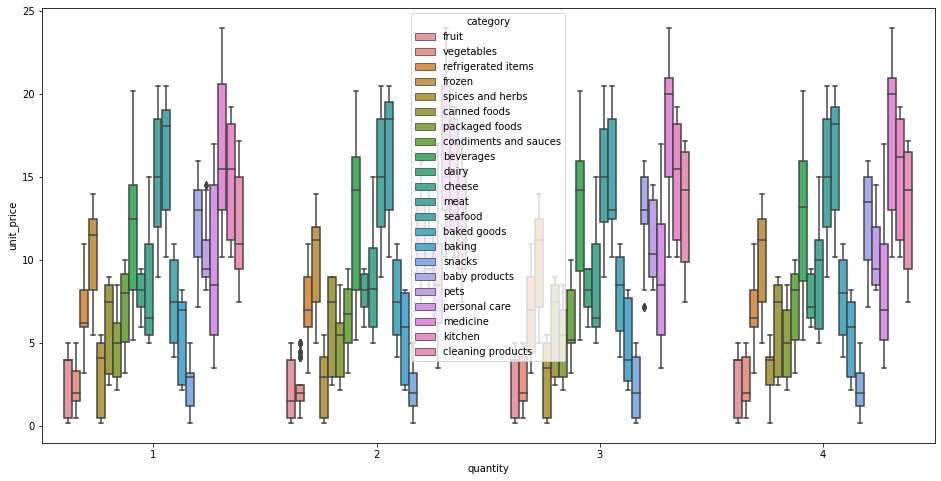

In [33]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(16, 8)
# Change position of legend
plt.legend(loc='upper right')

sns.boxplot(x='quantity', y='unit_price', hue='category', data=df)

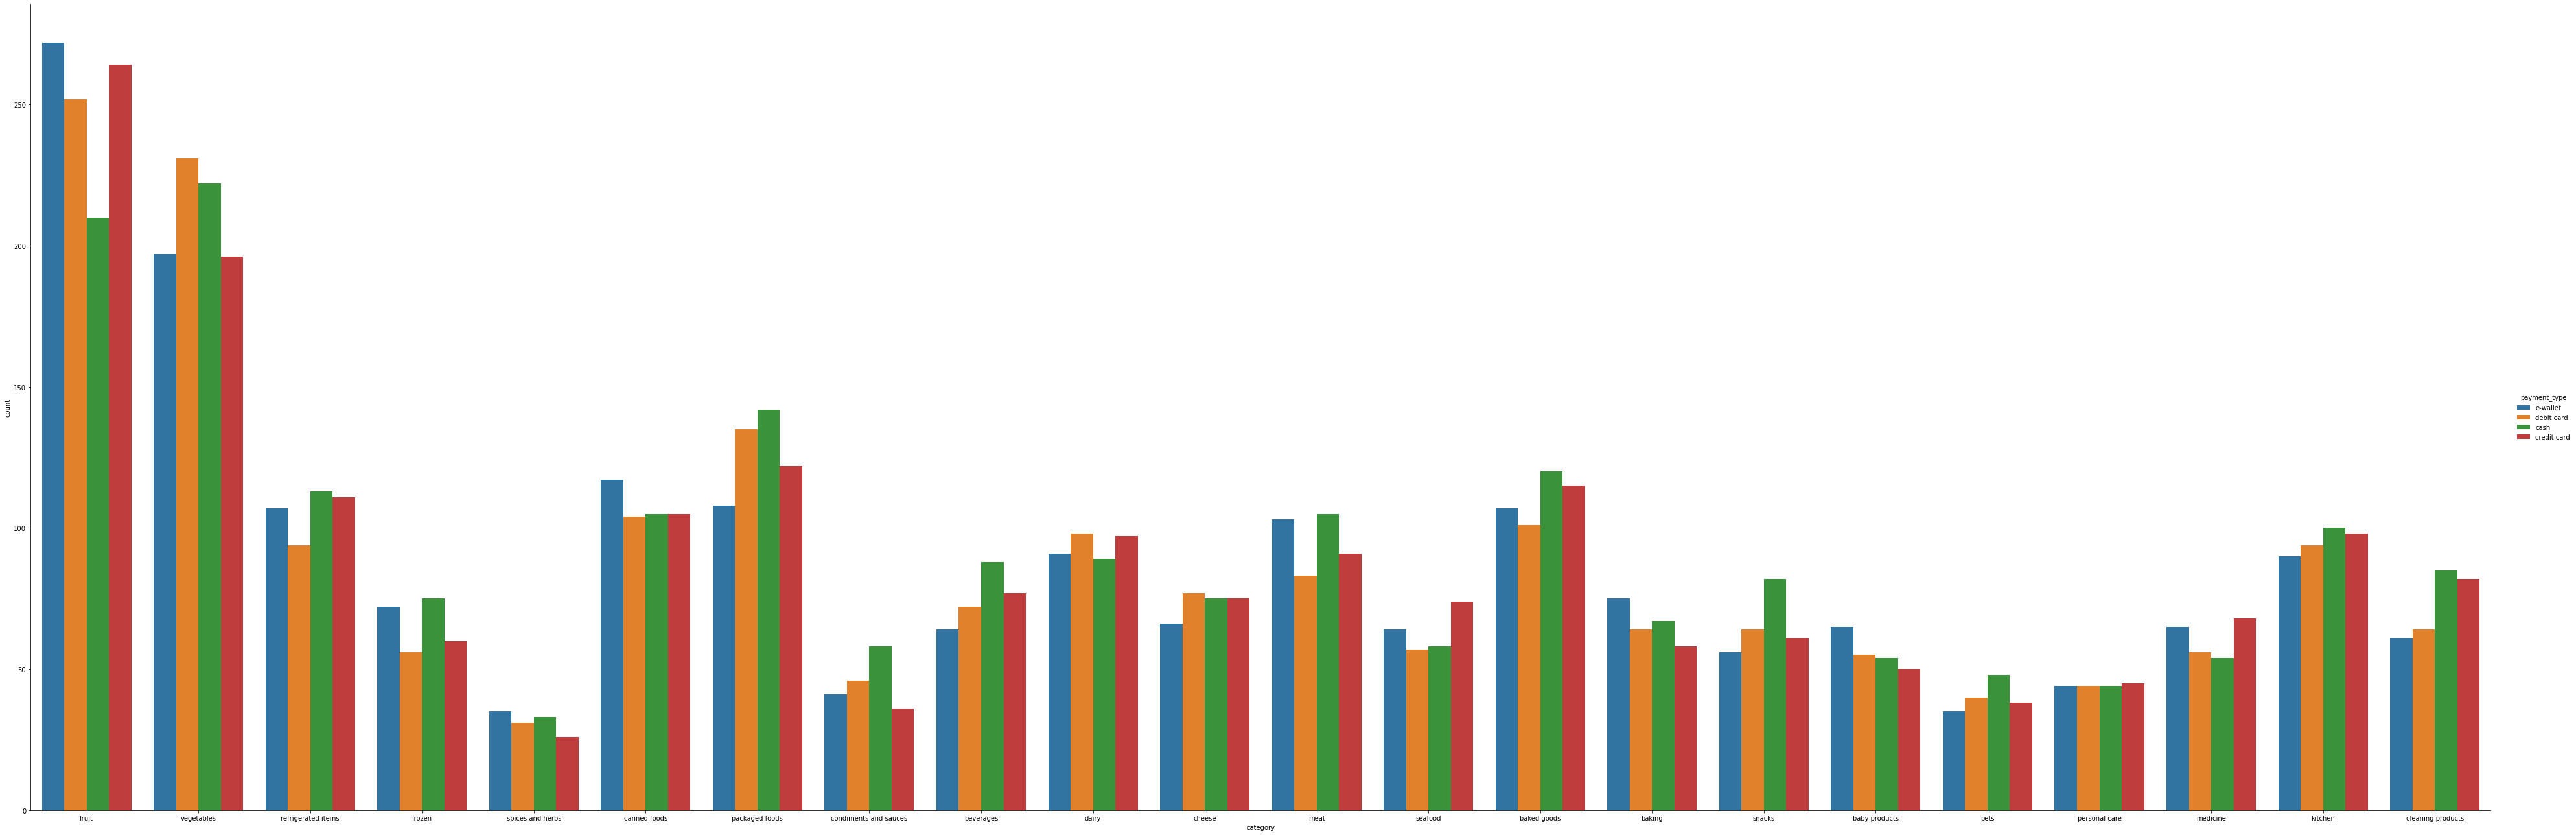

In [43]:
sns.catplot(x='category', hue='payment_type', data=df, kind='count', height=18, aspect=3)

We can see from this catplot the distribution of categories by their payment type. Fruits has the highest count in e-wallet, debit car and credit card with vegetables being second with debit card and cash. The top 5 categories are fruit, vegetables, packaged foods, baked goods and canned foods.

In [44]:
# Helper functions from eda.ipynb for visualization

def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

def correlation_plot(data: pd.DataFrame = None):
  corr = df.corr()
  corr.style.background_gradient(cmap='coolwarm')

In [47]:
get_unique_values(df, 'category')

Column: category has 22 unique values

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64


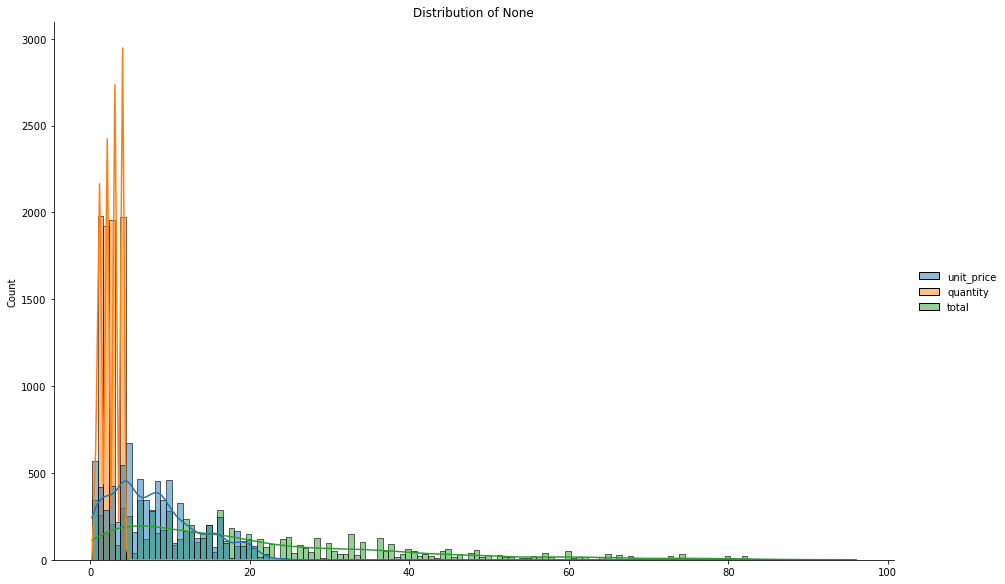

In [45]:
plot_continuous_distribution(df)

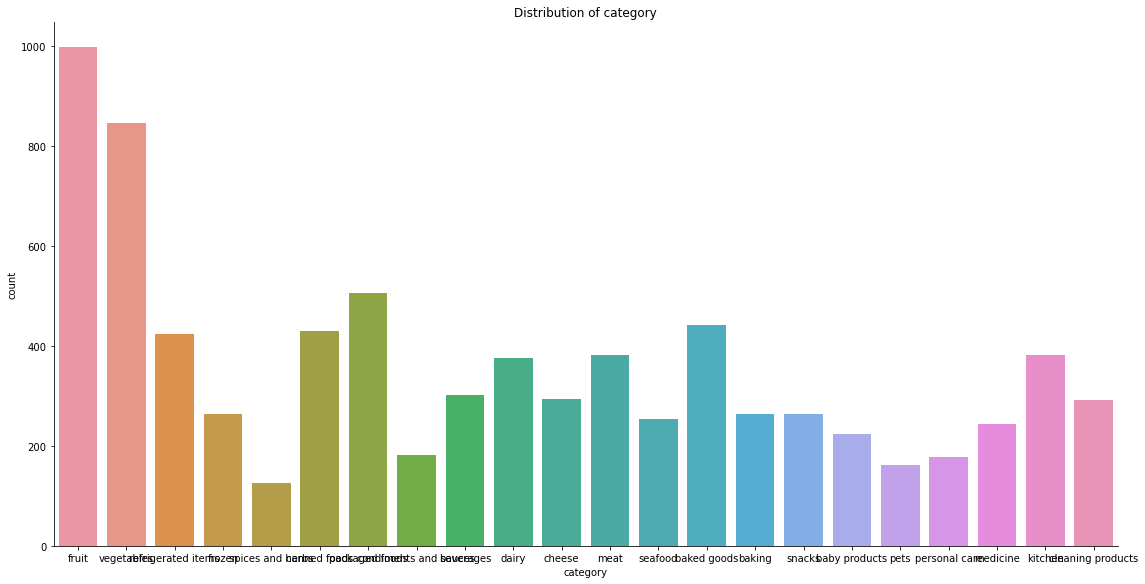

In [49]:
plot_categorical_distribution(df, 'category')

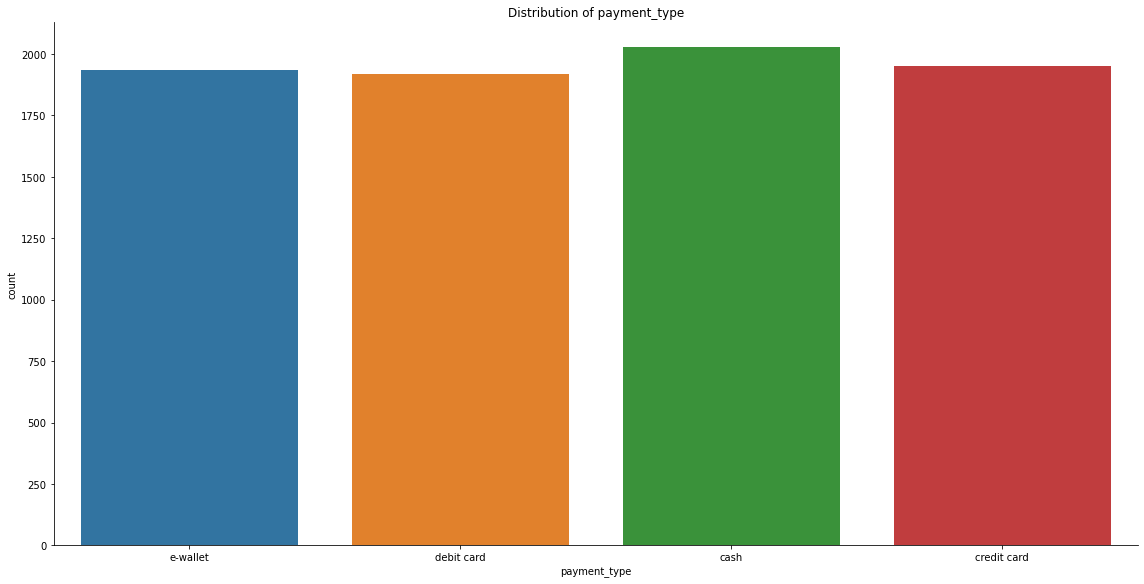

In [50]:
plot_categorical_distribution(df, 'payment_type')

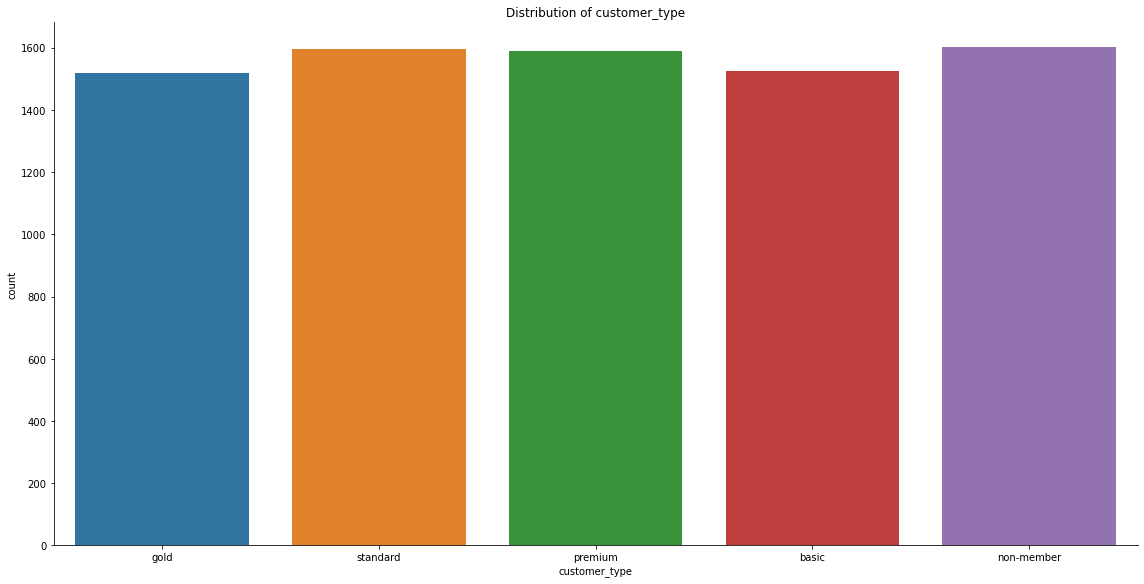

In [51]:
plot_categorical_distribution(df, 'customer_type')

In [56]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,unit_price,quantity,total
unit_price,1.000000,0.024588,0.792018
quantity,0.024588,1.000000,0.521926
total,0.792018,0.521926,1.000000


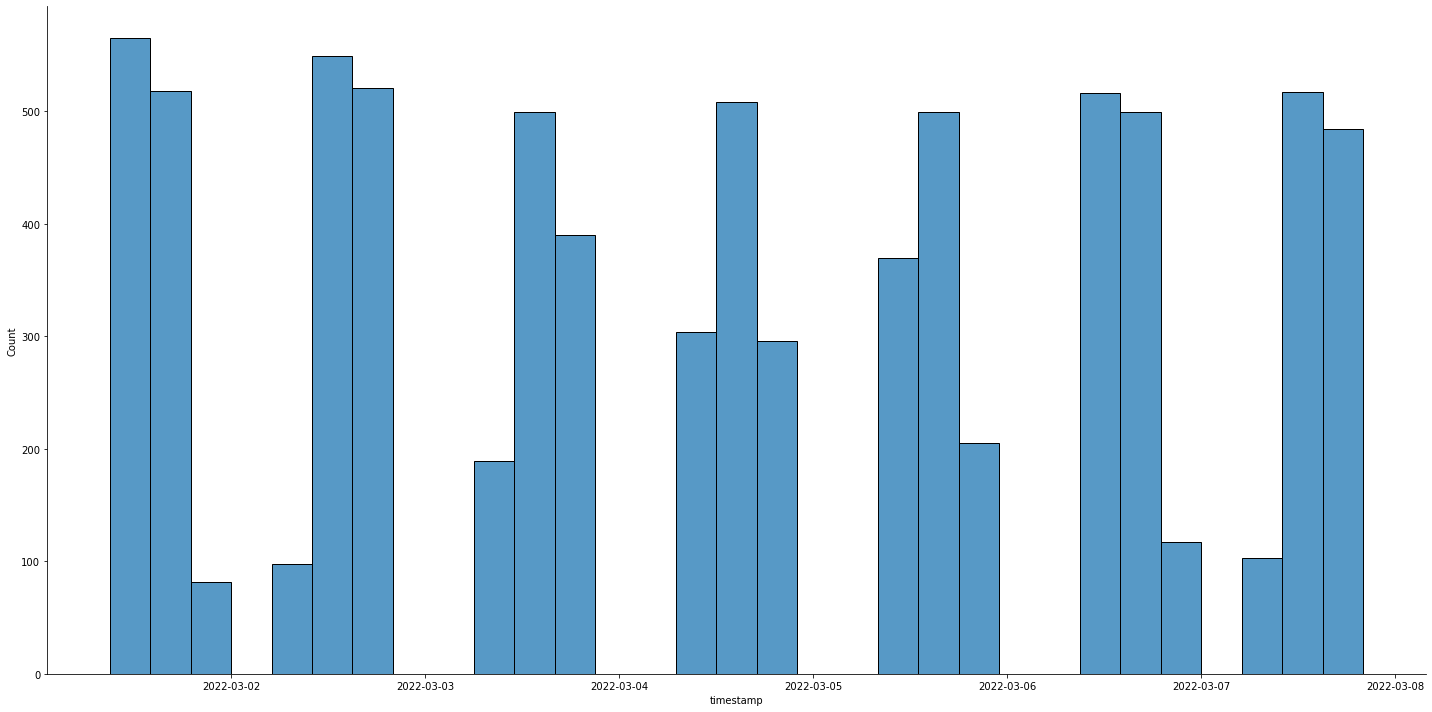

In [63]:
day_of_month = df['timestamp']
sns.displot(day_of_month,kde=False, bins=31, height=10, aspect=2)